In [1]:
import rnn, vae, config
import torch
import numpy as np
import matplotlib.pyplot as plt
import train_rnn
import train_vae
import json

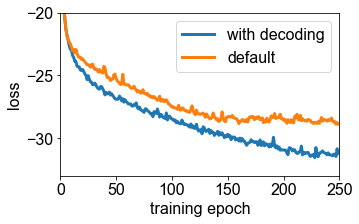

In [14]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed

state_vars_to_predict=[9, 10, 11]
detach_gradients = True
truncate_at_batch = 40
use_layernorm = True
random_index = 1
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
dim_latent_z = 8
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="with decoding")

state_vars_to_predict=[]
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="default")

plt.legend()
plt.ylim(-33, -20)
plt.xlim(0, 250)
plt.xlabel("training epoch")
plt.ylabel("loss")
plt.show()